# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

c:\Users\NU-CCIT\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\NU-CCIT\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [3]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [4]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [5]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<Axes: >

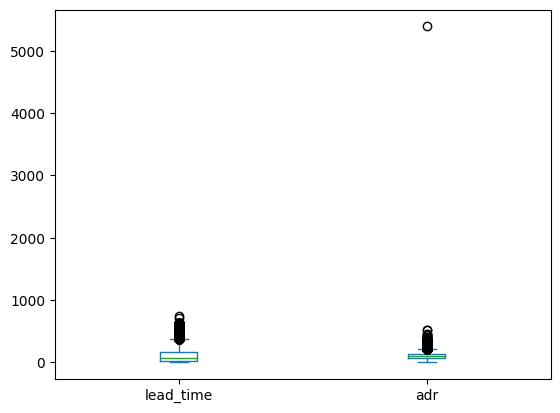

In [6]:
df[['lead_time', 'adr']].plot.box()

In [17]:
df.query('`adr` > 5000')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


### Interpretation - ADR and Lead Time Distribution

#### As depicted in the description, the average value of the lead time is 104 days indicating that customers usually book 100 days earlier than their supposed arrival date.

#### As for the ADR, it can be seen that there is an outlier in the plot, which means that there is a day which a customer booked a city hotel but cancelled. However, this outlier is a non-refund type, which led to the ADR of 5400.00 even with no booking.

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [7]:
# put your answer here

cancellation = df.groupby('is_canceled')['lead_time']
cancellation.describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


<Axes: xlabel='is_canceled'>

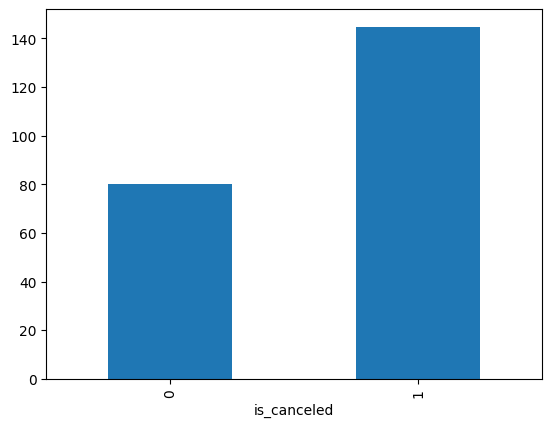

In [8]:
cancel_mean = cancellation.mean()

cancel_mean.plot.bar()

### Interpretation - Booking Cancellation

#### As seen in the table, there is a higher possibility of cancellation if the lead time is longer. On the other hand, if the waiting time between the booking and the arrival date is shorter, the cancellation rate is lower. This indicates that customers tend to cancel when they wait longer.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [15]:
# put your answer here

seasonal_pattern = df.pivot_table(values='adr',
               index=['arrival_date_month'],
               columns=['hotel'],
               aggfunc=np.mean)

print(seasonal_pattern)

hotel               City Hotel  Resort Hotel
arrival_date_month                          
April               111.251838     77.849496
August              114.680455    186.790574
December             88.826307     68.984230
February             85.088278     55.171930
January              82.628986     49.461883
July                110.734292    155.181299
June                119.074341    110.444749
March                92.643116     57.520147
May                 121.638560     78.758134
November             88.069601     48.273993
October              99.974498     62.097617
September           110.004661     93.252030


C:\Users\NU-CCIT\AppData\Local\Temp\ipykernel_7584\1997375025.py:3: FutureWarning: The provided callable <function mean at 0x0000020F6EDE0510> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seasonal_pattern = df.pivot_table(values='adr',


<Axes: xlabel='arrival_date_month'>

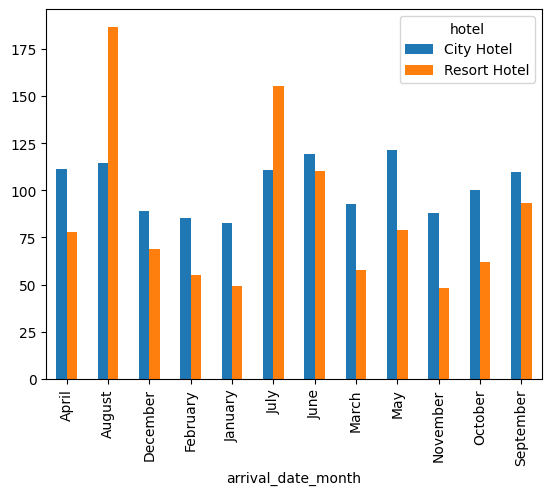

In [16]:
seasonal_pattern.plot.bar()

## Interpretation - Seasonal Pricing Pattern

#### For City Hotels, it can be seen that during the months of April to September, the Average Daily Rate is more than 100. This indicates that during the seasons of Spring and Summer, these hotels impose their prices high to gain more profit. 

#### For Resort Hotels, the Average Daily Rate spikes to more than 100 during the months of June, July, and August. This proves that Resort Hotels place their prices high during the Summer season for more profit as most people have their break during this time

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [22]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [39]:
# put your answer here

repeat_guests = df[['is_repeated_guest', 'is_canceled', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'lead_time']]
cancellation_rate = ((df['previous_cancellations'] + df['is_canceled']) / (df['previous_bookings_not_canceled'] + df['previous_cancellations']))
repeat_guests['cancellation_rate'] = cancellation_rate.astype(float)

repeat_guests_pattern = repeat_guests.groupby('is_repeated_guest').agg(
    cancel_rate=('cancellation_rate', 'mean'),
    booking_change=('booking_changes', 'sum'),
    lead_time=('lead_time', 'mean')
)

print(repeat_guests_pattern)


                   cancel_rate  booking_change   lead_time
is_repeated_guest                                         
0                          inf           25392  106.425221
1                          inf            1008   30.786352


C:\Users\NU-CCIT\AppData\Local\Temp\ipykernel_7584\683521627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_guests['cancellation_rate'] = cancellation_rate.astype(float)


### Interpretation - Repeated Guests Pattern

#### With this, we can see that the lower the lead time is, the higher the chance they will likely book again in the hotel. We can also see that repeated guests have the less number of booking changes, which means that they are more likely satisfied with their booking and will not change anything. 

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [ ]:
# put your answer here

cancel_bookings = df.corr(numeric_only=True)

print(cancel_bookings)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   

### Interpretation - Booking Cancellation Insights

#### As presented in the correlation table, we can identify three variables that present strong correlation with booking cancellation: lead time, previous cancellations, and days in waiting list. We can associate that the longer lead time, the higher the chances the customer will cancel the booking. Moreover, their waiting time before their booking is confirmed also affects the cancellation rate. This presents a pattern that a customer will most likely to cancel whenever they have to wait longer for confirmation. On the other hand, when a customer already has previous cancellations, they most likely will cancel again.